## CME538 GROUP PROJECT

### TTC SUBWAY, TTC BUS AND OC TRANSPO DATA VISUALIZATIONS

### Set up Notebook

In [51]:
import pandas as pd
# 3rd party imports
import os
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

In [52]:
# Import data
ttc_subway_df = pd.read_csv("ttc_subway_df.csv")
ttc_bus_df = pd.read_csv("ttc_bus_df.csv")
octranspo_df = pd.read_csv("OC_Transpo_Bus_Info_With_Times.csv")

### TTC SUBWAY

In [53]:
ttc_subway_df.head()

,Unnamed: 0,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [54]:
# print dataframe info
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Date        108004 non-null  object
 2   Time        108004 non-null  object
 3   Day         108004 non-null  object
 4   Station     108004 non-null  object
 5   Code        108004 non-null  object
 6   Min Delay   108004 non-null  int64 
 7   Min Gap     108004 non-null  int64 
 8   Bound       79240 non-null   object
 9   Line        107675 non-null  object
 10  Vehicle     108004 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.1+ MB


In [55]:
#Convert the 'Date' colum to datetime format
ttc_subway_df['Date'] = pd.to_datetime(ttc_subway_df['Date'])
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  108004 non-null  int64         
 1   Date        108004 non-null  datetime64[ns]
 2   Time        108004 non-null  object        
 3   Day         108004 non-null  object        
 4   Station     108004 non-null  object        
 5   Code        108004 non-null  object        
 6   Min Delay   108004 non-null  int64         
 7   Min Gap     108004 non-null  int64         
 8   Bound       79240 non-null   object        
 9   Line        107675 non-null  object        
 10  Vehicle     108004 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 9.1+ MB


In [56]:
# Set the data colum as the index
#Subway DF
ttc_subway_df.set_index('Date', inplace = True)
ttc_subway_df.head()



,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,,
2022-01-01,0,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01,1,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01,2,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01,3,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01,4,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


### Time-based indexing

In [57]:
# Add new columns 'year', 'month' and 'month_day'that indicate the year, month and day associated with each observation

ttc_subway_df['year'] = ttc_subway_df.index.year
ttc_subway_df['month'] = ttc_subway_df.index.month
ttc_subway_df['month_day'] = ttc_subway_df.index.day
ttc_subway_df.tail()

,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
Date,,,,,,,,,,,,,
2021-12-31,107999,01:10,Friday,MUSEUM STATION,SUUT,0,0,N,YU,5591,2021,12,31
2021-12-31,108000,01:12,Friday,FINCH STATION,SUDP,5,10,S,YU,5983,2021,12,31
2021-12-31,108001,01:21,Friday,EGLINTON WEST STATION,PUOPO,3,8,N,YU,6046,2021,12,31
2021-12-31,108002,01:37,Friday,SHEPPARD WEST STATION,SUDP,0,0,S,YU,5536,2021,12,31
2021-12-31,108003,07:00,Friday,DON MILLS STATION,TUSC,0,0,E,SHP,6146,2021,12,31


In [58]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108004 entries, 2022-01-01 to 2021-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Time        108004 non-null  object
 2   Day         108004 non-null  object
 3   Station     108004 non-null  object
 4   Code        108004 non-null  object
 5   Min Delay   108004 non-null  int64 
 6   Min Gap     108004 non-null  int64 
 7   Bound       79240 non-null   object
 8   Line        107675 non-null  object
 9   Vehicle     108004 non-null  int64 
 10  year        108004 non-null  int32 
 11  month       108004 non-null  int32 
 12  month_day   108004 non-null  int32 
dtypes: int32(3), int64(4), object(6)
memory usage: 10.3+ MB


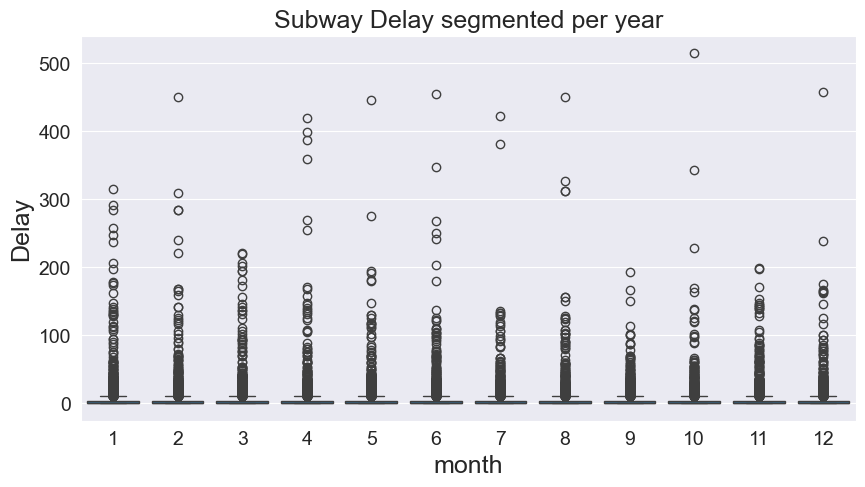

In [59]:
# PLot boxplot of delay per year
plt.figure(figsize=(10, 5))
plt.title('Subway Delay segmented per year', fontsize=18)
ax = sns.boxplot(x = ttc_subway_df['month'] , y = ttc_subway_df['Min Delay'])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('month', fontsize=18)
ax.set_ylabel('Delay', fontsize=18)
plt.show()

#I don't know why it doesnt graph boxplots

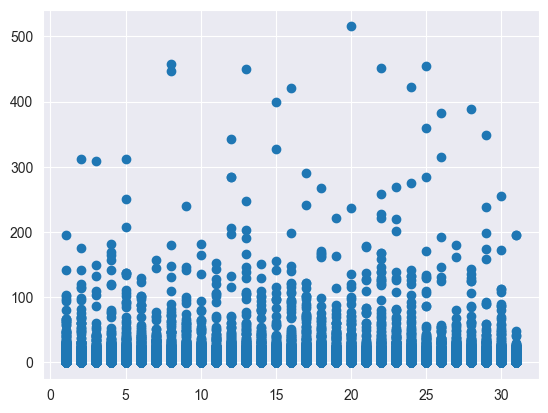

In [60]:
plt.scatter(ttc_subway_df['month_day'], ttc_subway_df['Min Delay'])
plt.show()

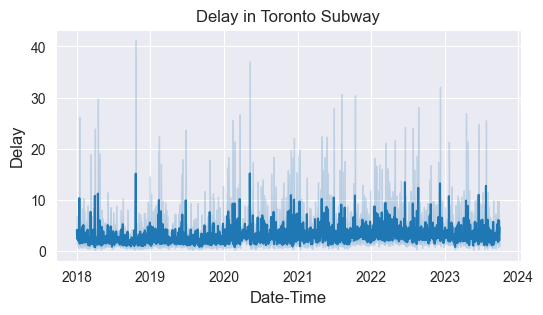

In [61]:
#Plot Toronto Delay
plt.figure(figsize=(6,3))
sns.lineplot(x=ttc_subway_df.index, y=ttc_subway_df['Min Delay'])

# Set labels 
plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Delay', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

### TTC BUS 

In [62]:
#Convert the 'Date' colum to datetime format
ttc_bus_df['Date'] = pd.to_datetime(ttc_bus_df['Date'])
ttc_bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  108004 non-null  int64         
 1   Date        108004 non-null  datetime64[ns]
 2   Time        108004 non-null  object        
 3   Day         108004 non-null  object        
 4   Station     108004 non-null  object        
 5   Code        108004 non-null  object        
 6   Min Delay   108004 non-null  int64         
 7   Min Gap     108004 non-null  int64         
 8   Bound       79240 non-null   object        
 9   Line        107675 non-null  object        
 10  Vehicle     108004 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 9.1+ MB


In [63]:
# Set the data colum as the index

ttc_bus_df.set_index('Date', inplace = True)
ttc_bus_df.head()

,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,,
2022-01-01,0,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01,1,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01,2,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01,3,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01,4,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


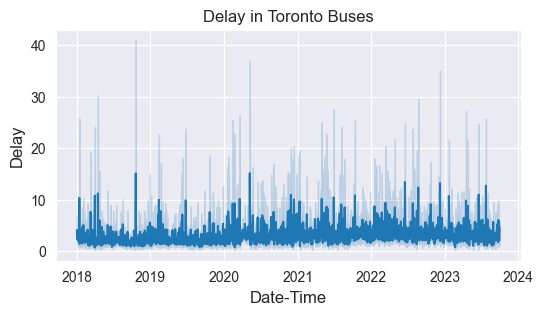

In [64]:
plt.figure(figsize=(6,3))
sns.lineplot(x=ttc_bus_df.index, y=ttc_bus_df['Min Delay'])

# Set labels 
plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Delay', fontsize=12)
plt.title("Delay in Toronto Buses")

plt.show()

### EXPLORATORY DATA ANALYSIS

In [65]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108004 entries, 2022-01-01 to 2021-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Time        108004 non-null  object
 2   Day         108004 non-null  object
 3   Station     108004 non-null  object
 4   Code        108004 non-null  object
 5   Min Delay   108004 non-null  int64 
 6   Min Gap     108004 non-null  int64 
 7   Bound       79240 non-null   object
 8   Line        107675 non-null  object
 9   Vehicle     108004 non-null  int64 
 10  year        108004 non-null  int32 
 11  month       108004 non-null  int32 
 12  month_day   108004 non-null  int32 
dtypes: int32(3), int64(4), object(6)
memory usage: 10.3+ MB


## Outliers

In [66]:
ttc_subway_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle,year,month,month_day
count,108004.000000,108004.000000,108004.000000,108004.000000,108004.000000,108004.000000,108004.000000
mean,54001.500000,2.971066,4.399124,3619.806989,2020.430151,6.289684,15.862959
std,31178.213574,9.874597,10.585862,2622.799270,1.750949,3.407509,8.824946
min,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000
25%,27000.750000,0.000000,0.000000,0.000000,2019.000000,3.000000,8.000000
50%,54001.500000,0.000000,0.000000,5186.000000,2020.000000,6.000000,16.000000
75%,81002.250000,4.000000,8.000000,5656.000000,2022.000000,9.000000,23.000000
max,108003.000000,515.000000,519.000000,69021.000000,2023.000000,12.000000,31.000000


C:\Users\diana\AppData\Local\Temp\ipykernel_16536\1108744901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')


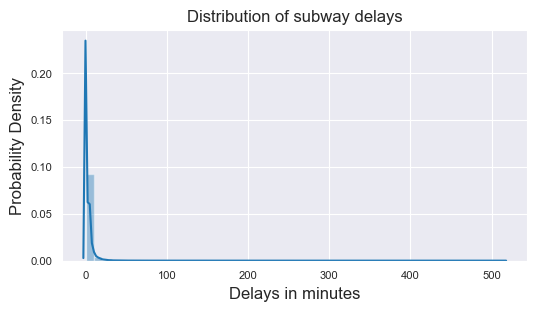

In [67]:
# Create probability density plot 
plt.figure(figsize=(6,3))
ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')

# Set labels and legend
plt.xlabel('Delays in minutes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of subway delays')

#Change tick sizes
ttc_delays.xaxis.set_tick_params(labelsize=8)
ttc_delays.yaxis.set_tick_params(labelsize=8)

# Show the plot
plt.show()

In [68]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1= ttc_subway_df['Min Delay'].quantile(0.25)
Q3= ttc_subway_df['Min Delay'].quantile(0.75)
IQR =Q3-Q1

#Define the bounds for outlier removal
lower_bound= Q1-1.5*IQR
upper_bound= Q3 +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_subway_df['Min Delay']<= upper_bound)
ttc_subway_df = ttc_subway_df[mask]

# View DataFrame
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 to 2021-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Time        102486 non-null  object
 2   Day         102486 non-null  object
 3   Station     102486 non-null  object
 4   Code        102486 non-null  object
 5   Min Delay   102486 non-null  int64 
 6   Min Gap     102486 non-null  int64 
 7   Bound       73761 non-null   object
 8   Line        102157 non-null  object
 9   Vehicle     102486 non-null  int64 
 10  year        102486 non-null  int32 
 11  month       102486 non-null  int32 
 12  month_day   102486 non-null  int32 
dtypes: int32(3), int64(4), object(6)
memory usage: 9.8+ MB


In [69]:
ttc_bus_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,108004.000000,108004.000000,108004.000000,108004.000000
mean,54001.500000,2.971066,4.399124,3619.806989
std,31178.213574,9.874597,10.585862,2622.799270
min,0.000000,0.000000,0.000000,0.000000
25%,27000.750000,0.000000,0.000000,0.000000
50%,54001.500000,0.000000,0.000000,5186.000000
75%,81002.250000,4.000000,8.000000,5656.000000
max,108003.000000,515.000000,519.000000,69021.000000


In [70]:
ttc_bus_df.head()

,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,,
2022-01-01,0,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01,1,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01,2,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01,3,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01,4,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [71]:
ttc_subway_df.head()

,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
Date,,,,,,,,,,,,,
2022-01-01,0,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1
2022-01-01,1,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1
2022-01-01,2,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1
2022-01-01,3,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1
2022-01-01,4,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1


In [72]:
# Unique values in the dataframe
print ('Number of unique Stations:',ttc_subway_df['Station'].nunique())
print ('Number of unique codes:',ttc_subway_df['Code'].nunique())
print ('Number of unique bound:',ttc_subway_df['Bound'].nunique())
print ('Number of unique lines:',ttc_subway_df['Line'].nunique())
print ('Number of unique vehicles:',ttc_subway_df['Vehicle'].nunique())



Number of unique Stations: 826
Number of unique codes: 206
Number of unique bound: 7
Number of unique lines: 55
Number of unique vehicles: 1068
